<a href="https://colab.research.google.com/github/jcohen1122/TAMID-Tech-Edu-2021/blob/main/Tamid_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import json
import csv
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
with open("astros_data.json") as json_file:
    data = json.load(json_file)
print(data)

{'Houston Astros': [{'Batting Avg': 0.267, 'Hits': 1496, 'Homeruns': 221, 'Losses': 67, 'RBIs': 834, 'Runs': 863, 'Strikeouts': 1222, 'Wins': 95, 'Year': 2021}, {'Batting Avg': 0.24, 'Hits': 478, 'Homeruns': 69, 'Losses': 31, 'RBIs': 368, 'Runs': 279, 'Strikeouts': 440, 'Wins': 29, 'Year': 2020}, {'Batting Avg': 0.274, 'Hits': 1538, 'Homeruns': 288, 'Losses': 55, 'RBIs': 891, 'Runs': 920, 'Strikeouts': 1166, 'Wins': 107, 'Year': 2019}, {'Batting Avg': 0.255, 'Hits': 1390, 'Homeruns': 205, 'Losses': 59, 'RBIs': 763, 'Runs': 797, 'Strikeouts': 1197, 'Wins': 83, 'Year': 2018}, {'Batting Avg': 0.282, 'Hits': 1581, 'Homeruns': 238, 'Losses': 61, 'RBIs': 854, 'Runs': 896, 'Strikeouts': 1087, 'Wins': 101, 'Year': 2017}, {'Batting Avg': 0.247, 'Hits': 1367, 'Homeruns': 198, 'Losses': 78, 'RBIs': 689, 'Runs': 724, 'Strikeouts': 1452, 'Wins': 84, 'Year': 2016}, {'Batting Avg': 0.25, 'Hits': 1363, 'Homeruns': 230, 'Losses': 76, 'RBIs': 691, 'Runs': 729, 'Strikeouts': 1392, 'Wins': 86, 'Year': 201

In [102]:
data = data['Houston Astros']

data_file = open('data.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(data[0].keys())

for num in data:
    csv_writer.writerow(num.values())
data_file.close()

In [ ]:
df = pd.read_csv('data.csv')
df

In [ ]:
#Games played column
df['Games Played'] = df['Wins'] + df['Losses']
df

In [ ]:
#Only consider years with full # of games played (162)
df2 = df.loc[df['Games Played'] == 162]
df2

In [103]:
#Only want certain columns
df3 = df2[['Year', 'Batting Avg', 'Strikeouts', 'Hits', 'Homeruns', 'Wins', 'Runs']]
df3

,Year,Batting Avg,Strikeouts,Hits,Homeruns,Wins,Runs
0,2021,0.267,1222,1496,221,95,863
2,2019,0.274,1166,1538,288,107,920
4,2017,0.282,1087,1581,238,101,896
5,2016,0.247,1452,1367,198,84,724
6,2015,0.250,1392,1363,230,86,729
7,2014,0.242,1442,1317,163,70,629
8,2013,0.240,1535,1307,148,51,610
9,2012,0.236,1365,1276,146,55,583
10,2011,0.258,1164,1442,95,56,615
11,2010,0.247,1025,1348,108,76,611


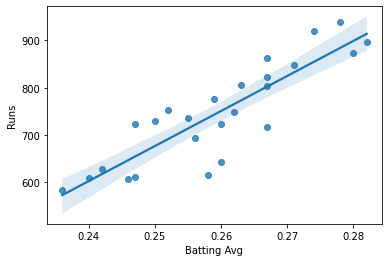

In [104]:
sns.regplot(x=df3['Batting Avg'], y=df3['Runs'])

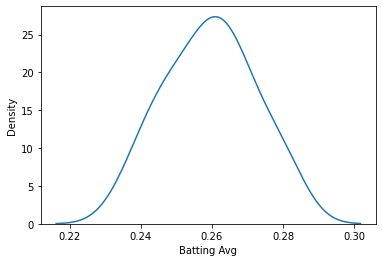

In [105]:
sns.kdeplot(df3['Batting Avg'])

In [106]:
YVar = df3['Runs']
XVar = df3['Batting Avg']

LinearModel = sm.OLS(YVar,XVar)
results = LinearModel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Runs   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2364.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    1.72e-25
Time:                        18:16:27   Log-Likelihood:                         -143.60
No. Observations:                  25   AIC:                                      289.2
Df Residuals:                      24   BIC:                                      290.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------